# Построение и визуализация 3D-цилиндра

Напишите программу для построения и визуализации 3D-цилиндра с помощью библиотеки matplotlib.

Шаги выполнения задания:

1.	Сформируйте вершины для построения цилиндра из 20 угловых секторов. Сначала постройте вершины одного основания (круга) — используйте углы поворота и радиус окружности равный 1.

Координаты вершин основания определяются по формуле:

0,cos(2*pi*(i)/N),sin(2*pi*(i)/N),
где выражение (2*pi*(i)/N) задает углы поворота на каждом шаге i.

2.	Аналогично постройте вершины второго основания, взяв высоту равную 1. Координаты вершин основания можно найти по формуле:

1,cos(2*pi*(i)/N),sin(2*pi*(i)/N)
3.	Используйте библиотеку spatial, чтобы сформировать грани для построения цилиндра из 20 угловых секторов. 

4.	Создайте сетку для построения цилиндра. 

5.	Визуализируйте полученный цилиндр.

6.	Сохраните изображение в формате stl.

In [1]:
import numpy as np

from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d
from scipy import spatial

import numpy as np
from stl import mesh

In [2]:
def create_base(x_0, y_0, z_0, r, n):

    phi = np.linspace(0, 2*np.pi, n)

    vertices = np.empty((0, 3))
    for p in phi:

        x = x_0
        y = y_0 + r * np.cos(p)
        z = z_0 + r * np.sin(p)
        
        vertices = np.append(vertices,[[x,y,z]], axis=0)

    return vertices

In [3]:
np.empty((0, 3))

array([], shape=(0, 3), dtype=float64)

In [4]:
base_0 = create_base(0.0, 0.0, 0.0, 1, 20)
base_1 = create_base(1.0, 0.0, 0.0, 1, 20)

vertices = np.append(base_0, base_1, axis = 0)
vertices

array([[ 0.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  9.45817242e-01,  3.24699469e-01],
       [ 0.00000000e+00,  7.89140509e-01,  6.14212713e-01],
       [ 0.00000000e+00,  5.46948158e-01,  8.37166478e-01],
       [ 0.00000000e+00,  2.45485487e-01,  9.69400266e-01],
       [ 0.00000000e+00, -8.25793455e-02,  9.96584493e-01],
       [ 0.00000000e+00, -4.01695425e-01,  9.15773327e-01],
       [ 0.00000000e+00, -6.77281572e-01,  7.35723911e-01],
       [ 0.00000000e+00, -8.79473751e-01,  4.75947393e-01],
       [ 0.00000000e+00, -9.86361303e-01,  1.64594590e-01],
       [ 0.00000000e+00, -9.86361303e-01, -1.64594590e-01],
       [ 0.00000000e+00, -8.79473751e-01, -4.75947393e-01],
       [ 0.00000000e+00, -6.77281572e-01, -7.35723911e-01],
       [ 0.00000000e+00, -4.01695425e-01, -9.15773327e-01],
       [ 0.00000000e+00, -8.25793455e-02, -9.96584493e-01],
       [ 0.00000000e+00,  2.45485487e-01, -9.69400266e-01],
       [ 0.00000000e+00,  5.46948158e-01

In [5]:
hull = spatial.ConvexHull(vertices)
faces = hull.simplices # Массив faces содержит описание граней
faces

array([[22,  3, 23],
       [22,  3,  2],
       [29,  9, 10],
       [29, 30, 10],
       [38, 18,  0],
       [38, 20,  0],
       [26,  7,  6],
       [26,  7, 27],
       [26,  6,  5],
       [26, 25,  5],
       [21,  1,  0],
       [21, 20,  0],
       [21,  1,  2],
       [21, 22,  2],
       [34, 14, 13],
       [34, 13, 33],
       [32, 12, 13],
       [32, 13, 33],
       [28,  7,  8],
       [28,  7, 27],
       [28,  9,  8],
       [28, 29,  9],
       [37, 16, 17],
       [37, 16, 36],
       [37, 18, 17],
       [37, 38, 18],
       [24,  3, 23],
       [24,  4,  3],
       [24, 25,  5],
       [24,  4,  5],
       [35, 16, 15],
       [35, 16, 36],
       [35, 14, 15],
       [35, 34, 14],
       [11,  9, 10],
       [11,  6,  5],
       [11, 18,  0],
       [11, 14, 15],
       [11,  1,  0],
       [11,  4,  5],
       [11,  1,  2],
       [11, 16, 15],
       [11,  9,  8],
       [11, 18, 17],
       [11,  7,  8],
       [11,  3,  2],
       [11,  7,  6],
       [11, 1

In [6]:
def plot_mesh(your_mesh, size_x=10, size_y=10, dpi=80, filename = None):
    
    figure = plt.figure(figsize=(size_x, size_y), dpi=dpi)
    
    axes = mplot3d.Axes3D(figure)
    axes.add_collection3d(mplot3d.art3d.Poly3DCollection(your_mesh.vectors, edgecolor="black"))
    
    figure.add_axes(axes)
    scale = your_mesh.points.flatten()
    axes.auto_scale_xyz(scale, scale, scale)
    
    if filename is None:
        plt.show()
    else:
        plt.savefig(filename)

<ipython-input-6-30e980bc2d94>:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  figure.add_axes(axes)


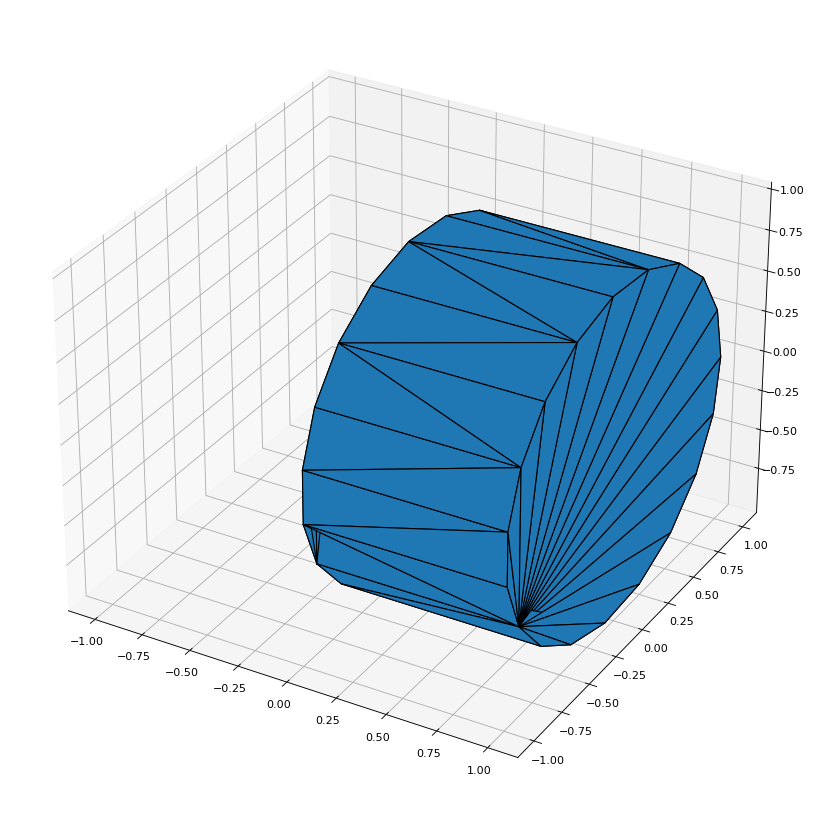

In [7]:
cylinder_mesh = mesh.Mesh(np.zeros(faces.shape[0], dtype=mesh.Mesh.dtype))
for i, f in enumerate(faces):
    for j in range(3):
        cylinder_mesh.vectors[i][j] = vertices[f[j],:]
plot_mesh(cylinder_mesh)

cylinder_mesh.save('cylinder.stl')